In [1]:
import pandas as pd
import numpy as np


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Colab Notebooks/Default Prediction/default-prediction'

In [9]:
train_df = pd.read_csv(path + '/data/preprocessed_train.csv')
train_df

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,funded_amnt,funded_amnt_inv,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,fico_range_low,fico_range_high,mths_since_last_delinq,emp_length,home_ownership1,home_ownership2,home_ownership3,home_ownership4,home_ownership5,home_ownership6,verification_status1,verification_status2,verification_status3,purpose1,purpose2,purpose3,purpose4,purpose5,purpose6,purpose7,purpose8,purpose9,purpose10,purpose11,purpose12,purpose13,purpose14,initial_list_status1,initial_list_status2,depvar
0,-1.081754,-0.714580,1.268921,-0.379776,0.347799,-0.356359,-0.606131,0.111419,-0.125132,-0.069391,-0.122671,-0.789949,-0.087483,-0.021592,-0.13636,-1.480871,-1.480713,-0.16441,0.410283,1.168632,-1.490430,-1.926837,-0.014032,-0.01403,-0.862201,2.439309,2.439258,-0.813329,-1.144282,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,-0.020849,0.075520,-1.627770,-0.379776,0.347799,1.155429,-0.480678,-0.056876,-0.125132,-0.069391,-0.122671,-0.722752,-0.087483,-0.021592,-0.13636,-0.677547,-0.677091,-0.16441,0.410283,-0.663281,-0.618820,-0.376955,-0.014032,-0.01403,-0.291495,-0.931324,-0.931310,-0.813329,-0.864096,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,-0.020849,-0.486924,0.611608,-0.379776,2.448541,-0.356359,-0.444100,-0.561764,-0.125132,-0.069391,-0.122671,-0.656279,-0.087483,-0.021592,-0.13636,-1.031955,-1.031630,-0.16441,0.410283,-0.846472,-0.998894,1.431937,-0.014032,-0.01403,-0.526425,-0.762793,-0.762782,2.118602,-0.303724,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0.131028,0.343351,-0.266789,4.040077,1.398170,-0.356359,-0.428430,0.448011,-0.125132,-0.069391,-0.122671,1.300588,-0.087483,-0.021592,-0.13636,0.149404,0.150166,-0.16441,0.410283,0.069484,0.286522,-0.335179,-0.014032,-0.01403,-0.456365,-0.425729,-0.425725,0.359443,-0.583910,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,-0.087854,-0.594056,0.804166,-0.379776,0.347799,2.667217,-0.365935,-1.066652,-0.125132,-0.069391,1.104094,-0.809459,-0.087483,-0.021592,-0.13636,-0.441275,-0.440732,-0.16441,0.410283,-0.663281,-0.370890,-0.506460,-0.014032,-0.01403,-0.598701,-1.099856,-1.099839,-0.813329,-0.303724,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.002087,-0.125353,-0.100381,-0.379776,2.448541,1.155429,-0.224164,-0.309320,6.527297,-0.069391,-0.122671,-0.691521,-0.087483,-0.021592,-0.13636,0.740084,0.741064,-0.16441,0.410283,0.252676,1.070512,1.014179,-0.014032,-0.01403,1.064940,-1.099856,-1.099839,-0.813329,0.536833,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1
99996,-0.934344,-0.125353,-1.858364,-0.379776,-0.702572,-0.356359,-0.648365,-1.066652,-0.125132,-0.069391,-0.122671,-0.827433,-0.087483,-0.021592,-0.13636,-0.913819,-0.913451,-0.16441,0.410283,-0.846472,-0.915900,-1.743024,-0.014032,-0.01403,-0.611775,2.439309,2.439258,-0.813329,1.657577,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
99997,0.090825,-0.379792,1.617189,-0.379776,0.347799,-0.356359,-0.328800,-0.393468,-0.125132,-0.069391,-0.122671,-0.226146,-0.087483,-0.021592,-0.13636,-0.866565,-0.866179,-0.16441,0.410283,1.351824,-0.815720,0.441850,-0.014032,-0.01403,-0.454358,-0.931324,-0.931310,-0.813329,-0.303724,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
99998,1.801674,-0.580665,-1.662240,-0.379776,0.347799,-0.356359,-0.566307,-1.739835,-0.125132,-0.069391,-0.122671,-0.842486,-0.087483,-0.021592,-0.13636,-0.972887,-0.972541,-0.16441,0.410283,-1.579237,-0.851520,0.809477,-0.014032,-0.01403,-0.418878,0.585460,0.585446,-0.813329,1.937763,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1


In [8]:
test_df = pd.read_csv(path + '/data/preprocessed_test.csv')
test_df = test_df.drop('ID', axis=1)
test_df

,acc_now_delinq,annual_inc,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,delinq_amnt,dti,emp_length,fico_range_high,fico_range_low,funded_amnt,funded_amnt_inv,inq_last_6mths,installment,int_rate,mths_since_last_delinq,open_acc,out_prncp,out_prncp_inv,pub_rec,revol_bal,revol_util,tax_liens,term1,tot_coll_amt,tot_cur_bal,total_acc,total_rec_int,total_rec_late_fee,home_ownership1,home_ownership2,home_ownership3,home_ownership4,home_ownership5,home_ownership6,verification_status1,verification_status2,verification_status3,purpose1,purpose2,purpose3,purpose4,purpose5,purpose6,purpose7,purpose8,purpose9,purpose10,purpose11,purpose12,purpose13,purpose14,initial_list_status1,initial_list_status2
0,-0.069391,-0.776449,-0.087483,-0.125132,-0.379776,-0.021592,0.899257,0.536833,0.248389,0.248397,-0.665733,-0.665273,-0.702572,-0.583998,0.314174,-0.813329,-1.396046,-0.014032,-0.01403,1.155429,-0.584341,-0.945106,-0.13636,0.410283,-0.122671,-0.806971,-1.234947,-0.750438,-0.164410,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,-0.069391,-0.125353,-0.087483,-0.125132,-0.379776,-0.021592,-0.540174,-0.864096,-0.594253,-0.594261,0.740084,0.741064,-0.702572,0.318260,1.319241,0.945829,-0.296898,-0.014032,-0.01403,-0.356359,0.427206,1.452824,-0.13636,-2.437320,-0.122671,-0.099221,-0.393468,0.877741,-0.164410,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,-0.069391,-0.286051,-0.087483,-0.125132,-0.379776,-0.021592,0.566441,1.657577,-0.594253,-0.594261,-0.441275,-0.440732,-0.702572,-0.410262,-0.579220,0.945829,-0.846472,-0.014032,-0.01403,-0.356359,-0.240158,0.178663,-0.13636,0.410283,-0.122671,-0.648636,-0.309320,-0.384376,0.926563,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,-0.069391,-0.034290,-0.087483,-0.125132,-0.379776,-0.021592,1.403236,-0.864096,-0.931310,-0.931324,1.590663,1.591958,-0.702572,0.941188,1.002087,-0.813329,0.802250,-0.014032,-0.01403,-0.356359,1.220810,0.684150,-0.13636,-2.437320,-0.122671,0.146255,0.111419,1.691199,-0.164410,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,-0.069391,-0.326226,-0.087483,-0.125132,-0.379776,-0.021592,0.843391,-0.864096,0.585446,0.585460,0.976356,0.977423,1.398170,0.568748,1.589493,-0.813329,0.252676,-0.014032,-0.01403,-0.356359,0.260214,0.354121,-0.13636,-2.437320,-0.122671,0.031622,-0.056876,1.944718,-0.164410,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35811,-0.069391,0.477266,-0.087483,-0.125132,-0.379776,-0.021592,-1.128545,-0.864096,-0.931310,-0.931324,-0.205003,-0.204373,-0.702572,-0.165829,-0.579220,-0.813329,0.252676,-0.014032,-0.01403,1.155429,-0.329125,-0.798891,-0.13636,0.410283,-0.122671,-0.752067,0.700455,-0.400978,-0.164410,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
35812,-0.069391,-0.393183,-0.087483,-0.125132,0.725187,-0.021592,1.669489,-1.144282,0.416917,0.416929,-1.031955,-1.031630,-0.702572,-1.041049,-1.081754,-0.226943,-0.480090,-0.014032,-0.01403,-0.356359,0.226046,0.638197,-0.13636,0.410283,-0.122671,-0.703281,0.363863,-0.737394,-0.164410,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
35813,-0.069391,-0.339617,-0.087483,-0.125132,-0.379776,-0.021592,-0.108701,-0.583910,0.416917,0.416929,-0.913819,-0.913451,-0.702572,-0.864682,0.133261,-0.813329,-0.846472,-0.014032,-0.01403,-0.356359,-0.486473,-0.853199,-0.13636,0.410283,-0.122671,-0.730627,-1.487391,-0.419849,-0.164410,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
35814,-0.069391,0.140496,-0.087483,-0.125132,-0.379776,-0.021592,-1.016814,-0.583910,1.091031,1.091055,-0.441275,-0.440732,-0.702572,-0.394242,-0.378207,-0.813329,-0.663281,-0.014032,-0.01403,1.155429,-0.412899,-0.773825,-0.13636,0.410283,-0.122671,-0.659419,-0.982504,-0.323743,-0.164410,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


Define X and y

In [23]:
X = train_df.drop('depvar', axis=1)
y = train_df['depvar']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
# data를 training set과 validation set으로 나누기
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [46]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(n_estimators=200, objective='binary' )

lgbm.fit(X_train, y_train)

y_pred = lgbm.predict(X_valid)

In [47]:
# y_valid가 1일 확률 출력
y_pred_prob = lgbm.predict_proba(X_valid)
y_pred_prob[:,1]

array([0.2470307 , 0.62040087, 0.27695902, ..., 0.17758903, 0.71167645,
       0.1246205 ])

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix
import seaborn as sns

In [49]:
def get_clf_eval(y_actual, y_pred):
    accuracy = accuracy_score(y_actual, y_pred)
    precision = precision_score(y_actual, y_pred)
    recall = recall_score(y_actual, y_pred)
    AUC = roc_auc_score(y_actual, y_pred)
    F1 = f1_score(y_actual, y_pred)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('AUC: {:.4f}'.format(AUC))
    print('F1: {:.4f}'.format(F1))
    
    sns.heatmap(confusion_matrix(y_actual, y_pred), annot=True, fmt='d', cmap='YlGnBu')


정확도: 0.7510
정밀도: 0.6657
재현율: 0.4827
AUC: 0.6822
F1: 0.5596


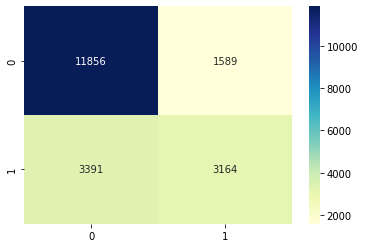

In [50]:
# 성능 확인
get_clf_eval(y_valid, y_pred)


정확도: 0.7496
정밀도: 0.6254
재현율: 0.5886
AUC: 0.7083
F1: 0.6064


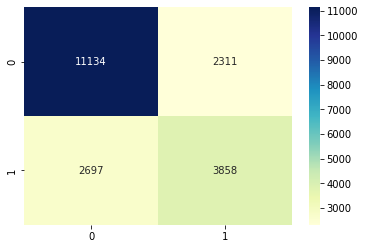

In [61]:
# threshold 변경 및 성능 확인
get_clf_eval(y_valid, y_pred_prob[:,1]>0.42)

In [69]:
# 제출 양식 다운로드
submit = pd.read_csv(path + '/data/sample_submission.csv')

# prediction 수행
test_df = pd.read_csv(path + '/data/preprocessed_test.csv')
test_df = test_df.drop('ID', axis=1)
test_X = test_df[X.columns]

y_pred_prob = lgbm.predict_proba(test_X)
y_pred_prob = (y_pred_prob[:,1]>0.42).astype(int)

submit['answer'] = y_pred_prob

# 제출 파일 저장
submit.to_csv(path + '/data/prediction.csv', index=False)

In [70]:
y_pred_prob

array([1, 1, 1, ..., 0, 0, 0])

In [64]:
test_X

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,funded_amnt,funded_amnt_inv,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,fico_range_low,fico_range_high,mths_since_last_delinq,emp_length,home_ownership1,home_ownership2,home_ownership3,home_ownership4,home_ownership5,home_ownership6,verification_status1,verification_status2,verification_status3,purpose1,purpose2,purpose3,purpose4,purpose5,purpose6,purpose7,purpose8,purpose9,purpose10,purpose11,purpose12,purpose13,purpose14,initial_list_status1,initial_list_status2
0,0.314174,-0.776449,0.899257,-0.379776,-0.702572,1.155429,-0.584341,-1.234947,-0.125132,-0.069391,-0.122671,-0.806971,-0.087483,-0.021592,-0.13636,-0.665733,-0.665273,-0.164410,0.410283,-1.396046,-0.583998,-0.945106,-0.014032,-0.01403,-0.750438,0.248397,0.248389,-0.813329,0.536833,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1.319241,-0.125353,-0.540174,-0.379776,-0.702572,-0.356359,0.427206,-0.393468,-0.125132,-0.069391,-0.122671,-0.099221,-0.087483,-0.021592,-0.13636,0.740084,0.741064,-0.164410,-2.437320,-0.296898,0.318260,1.452824,-0.014032,-0.01403,0.877741,-0.594261,-0.594253,0.945829,-0.864096,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,-0.579220,-0.286051,0.566441,-0.379776,-0.702572,-0.356359,-0.240158,-0.309320,-0.125132,-0.069391,-0.122671,-0.648636,-0.087483,-0.021592,-0.13636,-0.441275,-0.440732,0.926563,0.410283,-0.846472,-0.410262,0.178663,-0.014032,-0.01403,-0.384376,-0.594261,-0.594253,0.945829,1.657577,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1.002087,-0.034290,1.403236,-0.379776,-0.702572,-0.356359,1.220810,0.111419,-0.125132,-0.069391,-0.122671,0.146255,-0.087483,-0.021592,-0.13636,1.590663,1.591958,-0.164410,-2.437320,0.802250,0.941188,0.684150,-0.014032,-0.01403,1.691199,-0.931324,-0.931310,-0.813329,-0.864096,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1.589493,-0.326226,0.843391,-0.379776,1.398170,-0.356359,0.260214,-0.056876,-0.125132,-0.069391,-0.122671,0.031622,-0.087483,-0.021592,-0.13636,0.976356,0.977423,-0.164410,-2.437320,0.252676,0.568748,0.354121,-0.014032,-0.01403,1.944718,0.585460,0.585446,-0.813329,-0.864096,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35811,-0.579220,0.477266,-1.128545,-0.379776,-0.702572,1.155429,-0.329125,0.700455,-0.125132,-0.069391,-0.122671,-0.752067,-0.087483,-0.021592,-0.13636,-0.205003,-0.204373,-0.164410,0.410283,0.252676,-0.165829,-0.798891,-0.014032,-0.01403,-0.400978,-0.931324,-0.931310,-0.813329,-0.864096,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
35812,-1.081754,-0.393183,1.669489,0.725187,-0.702572,-0.356359,0.226046,0.363863,-0.125132,-0.069391,-0.122671,-0.703281,-0.087483,-0.021592,-0.13636,-1.031955,-1.031630,-0.164410,0.410283,-0.480090,-1.041049,0.638197,-0.014032,-0.01403,-0.737394,0.416929,0.416917,-0.226943,-1.144282,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
35813,0.133261,-0.339617,-0.108701,-0.379776,-0.702572,-0.356359,-0.486473,-1.487391,-0.125132,-0.069391,-0.122671,-0.730627,-0.087483,-0.021592,-0.13636,-0.913819,-0.913451,-0.164410,0.410283,-0.846472,-0.864682,-0.853199,-0.014032,-0.01403,-0.419849,0.416929,0.416917,-0.813329,-0.583910,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
35814,-0.378207,0.140496,-1.016814,-0.379776,-0.702572,1.155429,-0.412899,-0.982504,-0.125132,-0.069391,-0.122671,-0.659419,-0.087483,-0.021592,-0.13636,-0.441275,-0.440732,-0.164410,0.410283,-0.663281,-0.394242,-0.773825,-0.014032,-0.01403,-0.323743,1.091055,1.091031,-0.813329,-0.583910,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
